### Table of Content

[1. KNN Implementation](#knn1) <br>

[2. KNN Using sklearn](#knn2) <br>

## <a id='knn1'></a> 1. KNN Implementation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        print(f"For {x}, its distances to training points:\n{distances}")
        
        #sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances, kind='mergesort')[:self.k]
        print(f"For {x}, indices of {self.k} nearest neighours in training data:\n{k_indices}\n")
        
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1) #see which one got the highest num
        return most_common[0][0] #return the label of the most common class label


In [5]:
data = {
    'Feature1': [2, 4, 4, 6, 6, 8, 10],
    'Feature2': [4, 2, 8, 6, 1, 4, 9],
    'Label': ['black', 'black', 'black', 'red', 'red', 'red', 'red']
}
df = pd.DataFrame(data)

df

,Feature1,Feature2,Label
0,2,4,black
1,4,2,black
2,4,8,black
3,6,6,red
4,6,1,red
5,8,4,red
6,10,9,red


In [6]:
X_train = df[['Feature1', 'Feature2']].values
y_train = df['Label'].values

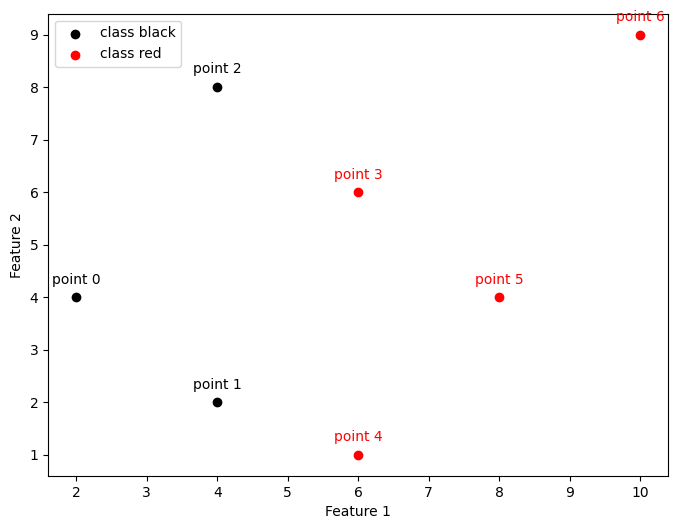

In [9]:
plt.figure(figsize=(8, 6))
for label in np.unique(y_train):
    idx = np.where(y_train == label)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], label=f"class {label}", color=f"{label}")
    for i in idx[0]:  #use idx[0] as np.where returns a tuple
        plt.annotate(f'point {i}', (X_train[i, 0], X_train[i, 1]), 
                     textcoords="offset points", xytext=(0,10), ha='center', color=f"{label}")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [10]:
knn = KNearestNeighbors(k=3)
knn.fit(X_train, y_train)

test_points = np.array([[5, 5], [6, 4]])
predictions = knn.predict(test_points)

print("predictions:", predictions)

For [5 5], its distances to training points:
[3.1622776601683795, 3.1622776601683795, 3.1622776601683795, 1.4142135623730951, 4.123105625617661, 3.1622776601683795, 6.4031242374328485]
For [5 5], indices of 3 nearest neighours in training data:
[3 0 1]

For [6 4], its distances to training points:
[4.0, 2.8284271247461903, 4.47213595499958, 2.0, 3.0, 2.0, 6.4031242374328485]
For [6 4], indices of 3 nearest neighours in training data:
[3 5 1]

predictions: ['black' 'red']


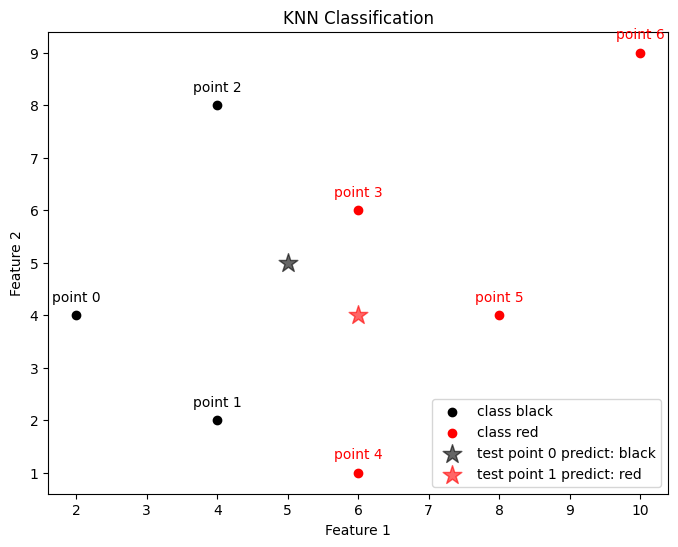

In [11]:
# Visualizing the test points with the training set
plt.figure(figsize=(8, 6))
for label in np.unique(y_train):
    idx = np.where(y_train == label)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], label=f"class {label}", color=f"{label}")
    for i in idx[0]:  #use idx[0] as np.where returns a tuple
        plt.annotate(f'point {i}', (X_train[i, 0], X_train[i, 1]), 
                     textcoords="offset points", xytext=(0,10), ha='center', color=f"{label}")
                
plt.scatter(test_points[0][0], test_points[0][1] , 
            marker='*', color=f"{predictions[0]}", alpha=0.6, s=200, 
            label=f"test point 0 predict: {predictions[0]}")
plt.scatter(test_points[1][0], test_points[1][1] , 
            marker='*', color=f"{predictions[1]}", alpha=0.6, s=200, 
            label=f"test point 1 predict: {predictions[1]}")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification')
plt.legend()
plt.show()

---

## <a id='knn2'></a> 2. KNN Using sklearn

In [ ]:
#official example on sklearn: 
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))